In [32]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv(r"C:\Users\easil\Downloads\archive (3)\Mall_Customers.csv")

In [34]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
df.isnull().sum().sum()

0

In [41]:
# Assuming you have selected relevant features in the 'X' variable
X = df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [42]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [43]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [44]:
df.duplicated().sum()

0

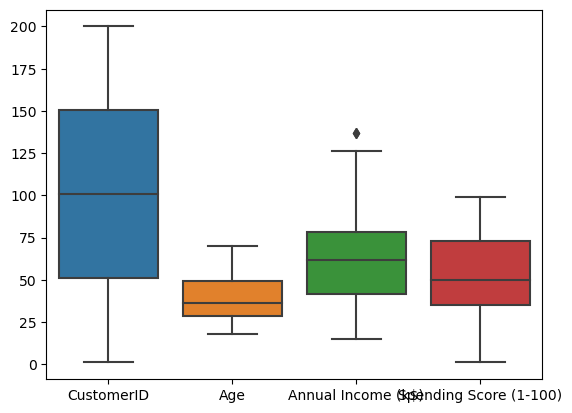

In [45]:
sns.boxplot(data = df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


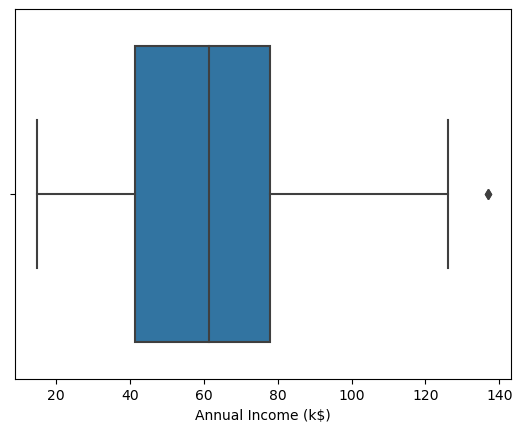

In [47]:
sns.boxplot(df['Annual Income (k$)'])
plt.show()

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
num_clusters = 3  # You can choose the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [20]:
df['Cluster'] = clusters

In [21]:
df['Cluster'] 

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    2
197    1
198    1
199    1
Name: Cluster, Length: 200, dtype: int32

In [22]:
cluster_means = df.groupby('Cluster').mean()

In [23]:
cluster_means 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,60.573529,25.838235,42.750000,53.647059
1,161.951220,32.853659,87.341463,79.975610
2,102.648352,51.274725,61.802198,34.208791


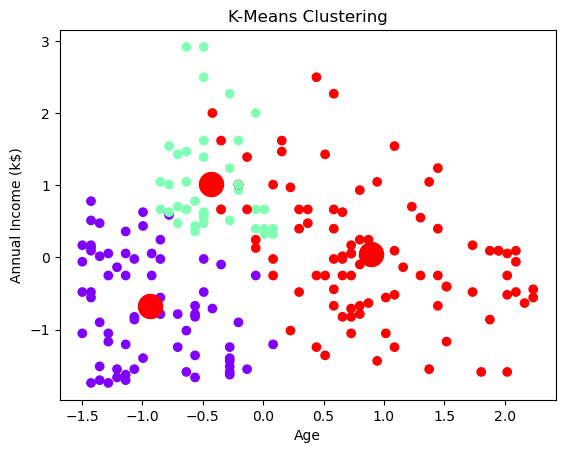

In [50]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering')
plt.show()

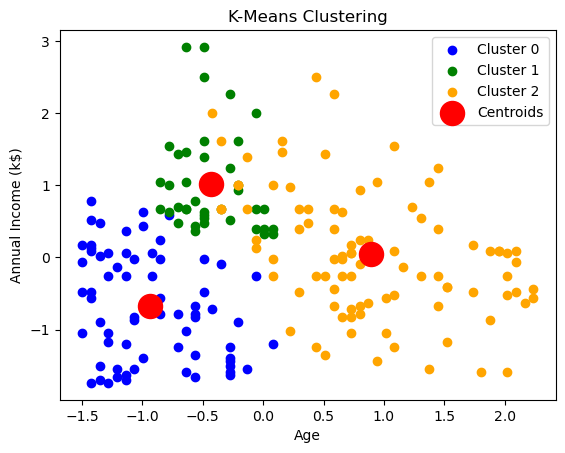

In [59]:
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the customer data with the 'Cluster' column added from the previous code
# And 'data' has columns 'Age' and 'Annual Income (k$)'

# Create a scatter plot for clusters labeled as 0, 1, and 2 with different colors
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], c='blue', label='Cluster 0')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], c='green', label='Cluster 1')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], c='orange', label='Cluster 2')

# Plot the cluster centroids in red
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
